## Krok 1: Import bibliotek

**PyCaret** to narzędzie AutoML - automatyzuje cały proces budowania modelu!

In [ ]:
# Instalacja PyCaret (tylko raz, przy pierwszym uruchomieniu)
# pip install pycaret

In [1]:
# Importujemy potrzebne biblioteki
import pandas as pd  # Do pracy z tabelami danych
import numpy as np  # Do obliczeń matematycznych
import matplotlib.pyplot as plt  # Do wykresów
import seaborn as sns  # Do ładniejszych wykresów

# PyCaret - AutoML do klasyfikacji
from pycaret.classification import *

# Ustawienia wykresów
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Ignoruj ostrzeżenia (żeby output był czystszy)
import warnings
warnings.filterwarnings('ignore')

print("✅ Biblioteki zaimportowane!")

✅ Biblioteki zaimportowane!


## Krok 2: Wczytanie danych

Wczytujemy dane klientów firmy telekomunikacyjnej.

In [2]:
# Wczytujemy dane z pliku CSV
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("📊 Podstawowe informacje o danych:")
print(f"Liczba klientów: {len(df)}")
print(f"Liczba cech (kolumn): {len(df.columns)}")
print(f"\nPierwsze 5 wierszy:")
df.head()

📊 Podstawowe informacje o danych:
Liczba klientów: 7043
Liczba cech (kolumn): 21

Pierwsze 5 wierszy:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 📋 Opis kolumn w danych

**Dane klienta:**
- **customerID** - Unikalny ID klienta
- **gender** - Płeć (Male/Female)
- **SeniorCitizen** - Czy senior? (0=Nie, 1=Tak)
- **Partner** - Czy ma partnera? (Yes/No)
- **Dependents** - Czy ma osoby na utrzymaniu? (Yes/No)

**Usługi:**
- **tenure** - Ile miesięcy jest klientem
- **PhoneService** - Usługa telefoniczna (Yes/No)
- **MultipleLines** - Wiele linii telefonicznych (Yes/No/No phone service)
- **InternetService** - Typ internetu (DSL/Fiber optic/No)
- **OnlineSecurity** - Zabezpieczenia online (Yes/No/No internet service)
- **OnlineBackup** - Backup online (Yes/No/No internet service)
- **DeviceProtection** - Ochrona urządzenia (Yes/No/No internet service)
- **TechSupport** - Wsparcie techniczne (Yes/No/No internet service)
- **StreamingTV** - Streaming TV (Yes/No/No internet service)
- **StreamingMovies** - Streaming filmów (Yes/No/No internet service)

**Rozliczenia:**
- **Contract** - Typ umowy (Month-to-month/One year/Two year)
- **PaperlessBilling** - E-faktury (Yes/No)
- **PaymentMethod** - Metoda płatności (Electronic check/Mailed check/Bank transfer/Credit card)
- **MonthlyCharges** - Miesięczne opłaty w USD
- **TotalCharges** - Suma opłat od początku w USD

**🎯 Zmienna docelowa:**
- **Churn** - Czy klient odszedł? (Yes/No) - **TO CHCEMY PRZEWIDZIEĆ!**

In [3]:
# Sprawdzamy kolumny w danych
print("\n📋 Kolumny w danych:")
print(df.columns.tolist())

# Informacje o typach danych
print("\n🔍 Typy danych:")
print(df.info())


📋 Kolumny w danych:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

🔍 Typy danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecu


👥 Rozkład zmiennej docelowej (Churn):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Procent klientów, którzy odeszli: 26.5%


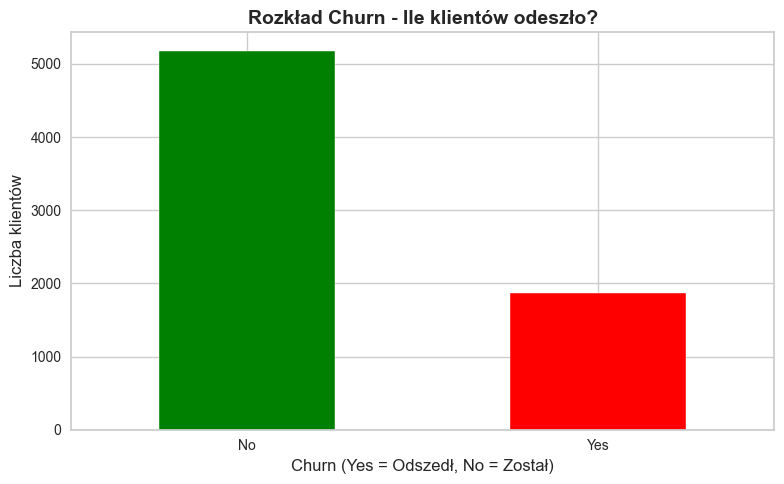


💡 Ok, mamy ~27% klientów, którzy odeszli. To wystarczająco dużo, żeby zbudować model!


In [4]:
# Ile klientów odeszło?
print("\n👥 Rozkład zmiennej docelowej (Churn):")
print(df['Churn'].value_counts())
print(f"\nProcent klientów, którzy odeszli: {df['Churn'].value_counts(normalize=True)['Yes']*100:.1f}%")

# Wizualizacja
plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Rozkład Churn - Ile klientów odeszło?', fontsize=14, fontweight='bold')
plt.xlabel('Churn (Yes = Odszedł, No = Został)', fontsize=12)
plt.ylabel('Liczba klientów', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n💡 Ok, mamy ~27% klientów, którzy odeszli. To wystarczająco dużo, żeby zbudować model!")

## Krok 3: Podstawowe czyszczenie danych

**Co robimy:**
- Usuwamy kolumnę `customerID` (to tylko etykietka, nie pomaga w przewidywaniu)
- Sprawdzamy braki w danych

In [5]:
# customerID to tylko numer - nie ma wartości predykcyjnej
# Usuwamy go, żeby model się na nim nie uczył
df = df.drop('customerID', axis=1)

print("✅ Kolumna 'customerID' usunięta")
print(f"Pozostało kolumn: {len(df.columns)}")

✅ Kolumna 'customerID' usunięta
Pozostało kolumn: 20


In [6]:
# Sprawdzamy braki w danych (missing values)
print("\n🔍 Braki w danych:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("Brak braków w danych! ✅")


🔍 Braki w danych:
Brak braków w danych! ✅


In [7]:
# TotalCharges powinno być liczbą, ale może być tekstem z spacjami
# Sprawdzamy i naprawiamy
print("\n🔧 Naprawiamy kolumnę TotalCharges...")

# Konwertujemy na liczby, nieprawidłowe wartości zastępujemy NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Sprawdzamy ile mamy NaN
nan_count = df['TotalCharges'].isnull().sum()
print(f"Znaleziono {nan_count} nieprawidłowych wartości w TotalCharges")

if nan_count > 0:
    # Wypełniamy NaN zerem (nowi klienci mają tenure=0, więc TotalCharges=0 ma sens)
    df['TotalCharges'].fillna(0, inplace=True)
    print("✅ Wypełniono zerami (nowi klienci bez historii płatności)")


🔧 Naprawiamy kolumnę TotalCharges...
Znaleziono 11 nieprawidłowych wartości w TotalCharges
✅ Wypełniono zerami (nowi klienci bez historii płatności)


## Krok 4: Setup PyCaret

**To najważniejszy krok!**

PyCaret automatycznie:
- Dzieli dane na **treningowe** (80%) i **testowe** (20%)
- Koduje zmienne kategoryczne (np. 'Yes'/'No' → 1/0)
- Normalizuje dane liczbowe
- Przygotowuje cross-validation

**target='Churn'** - to jest kolumna, którą chcemy przewidzieć!

In [8]:
# Inicjalizujemy PyCaret
# target = kolumna, którą przewidujemy (Churn: Yes/No)
# session_id = dla powtarzalności wyników
# train_size = 80% danych do treningu, 20% do testu

clf_setup = setup(
    data=df,
    target='Churn',
    session_id=123,
    train_size=0.8,
    fold=5,  # 5-fold cross-validation (wyjaśnię za chwilę!)
    fix_imbalance=False,  # Nie balansujemy klas (77% vs 27% jest ok)
    remove_multicollinearity=False,  # Nie usuwamy skorelowanych cech
    normalize=True  # Normalizacja danych numerycznych
)

print("\n✅ PyCaret skonfigurowany i gotowy!")

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 20)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(5634, 41)"
7,Transformed test set shape,"(1409, 41)"
8,Numeric features,4
9,Categorical features,15



✅ PyCaret skonfigurowany i gotowy!


## 📚 KLUCZOWA LEKCJA: Cross-Validation vs Training Accuracy

### 🎯 Co to jest Cross-Validation?

**Dla laika:**
Wyobraź sobie, że uczysz się do egzaminu:
- **Training Accuracy** = rozwiązujesz te same zadania 100 razy i dostajesz 100% (ale to oszustwo!)
- **Cross-Validation** = rozwiązujesz 5 różnych zestawów zadań i średnio dostajesz 85% (to prawdziwa umiejętność!)

### 🔬 Technicznie:

**Training Accuracy (naiwne podejście):**
```
1. Uczysz model na danych treningowych (80%)
2. Testujesz go NA TYCH SAMYCH danych treningowych
3. Dostajesz 99% accuracy
❌ Problem: Model "zapamiętał" dane, a nie nauczył się wzorców!
```

**Cross-Validation (5-fold):**
```
Dzielimy dane treningowe na 5 części:

Fold 1: [TEST] [TRAIN] [TRAIN] [TRAIN] [TRAIN] → accuracy: 84%
Fold 2: [TRAIN] [TEST] [TRAIN] [TRAIN] [TRAIN] → accuracy: 86%
Fold 3: [TRAIN] [TRAIN] [TEST] [TRAIN] [TRAIN] → accuracy: 83%
Fold 4: [TRAIN] [TRAIN] [TRAIN] [TEST] [TRAIN] → accuracy: 85%
Fold 5: [TRAIN] [TRAIN] [TRAIN] [TRAIN] [TEST] → accuracy: 84%

Średnia: 84.4% ± 1.2% (to prawdziwy wynik!)
```

✅ **Cross-Validation pokazuje, jak model radzi sobie z NOWYMI danymi!**

### 🚨 OVERFITTING = gdy różnica jest duża!

**Przykład złego modelu:**
- Training Accuracy: **99%** 😃
- Cross-Validation: **60%** 😱
- **Różnica: 39%** → MODEL SIĘ PRZEPASOWAŁ!

**Przykład dobrego modelu:**
- Training Accuracy: **85%** 
- Cross-Validation: **84%** 
- **Różnica: 1%** → Model stabilny! ✅

### 💡 Wniosek dla biznesu:

**Lepszy jest model z 84% accuracy (stabilny)** 
**niż model z 99% accuracy (overfitted)**

Bo pierwszy będzie działał w praktyce, drugi zawiedzie!

## Krok 5: Porównanie modeli

**Co robi `compare_models()`?**
- Testuje ~15 różnych algorytmów ML
- Dla każdego używa **cross-validation** (nie training accuracy!)
- Sortuje wyniki od najlepszego

**Metryki:**
- **Accuracy** - % prawidłowych przewidywań
- **AUC** - jak dobrze model rozróżnia klasy (0.5=losowanie, 1.0=idealny)
- **Recall** - ile % odchodzących klientów udało się wykryć
- **Precision** - ile % przewidywań "klient odejdzie" było prawidłowych
- **F1** - średnia harmoniczna Recall i Precision

In [9]:
# Porównujemy różne modele ML
# To zajmie ~2-3 minuty

print("🔄 Trenowanie i porównywanie modeli...")
print("To może potrwać kilka minut - testujemy ~15 algorytmów!\n")

# Porównujemy modele
# sort='AUC' - sortujemy po AUC (najlepsza metryka dla churn)
# n_select=10 - pokazujemy top 10 modeli
best_models = compare_models(sort='AUC', n_select=10)

print("\n✅ Porównanie zakończone!")
print("\n💡 WAŻNE: Powyższe wyniki to CROSS-VALIDATION, nie training accuracy!")
print("   To znaczy, że model był testowany na danych, których NIE widział podczas treningu.")
print("   To prawdziwy obraz tego, jak model będzie działał w praktyce!")

🔄 Trenowanie i porównywanie modeli...
To może potrwać kilka minut - testujemy ~15 algorytmów!



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7993,0.8463,0.7993,0.7903,0.7924,0.4534,0.4578,0.4140
lr,Logistic Regression,0.8039,0.8457,0.8039,0.7967,0.7985,0.4720,0.4753,1.4040
ada,Ada Boost Classifier,0.8019,0.8441,0.8019,0.7936,0.7953,0.4617,0.4661,0.2460
ridge,Ridge Classifier,0.8003,0.8373,0.8003,0.7908,0.7921,0.4508,0.4571,0.1400
lda,Linear Discriminant Analysis,0.7971,0.8372,0.7971,0.7906,0.7927,0.4586,0.4607,0.1440
lightgbm,Light Gradient Boosting Machine,0.7900,0.8359,0.7900,0.7811,0.7837,0.4321,0.4352,0.3020
rf,Random Forest Classifier,0.7913,0.8248,0.7913,0.7802,0.7823,0.4242,0.4302,0.2580
svm,SVM - Linear Kernel,0.7815,0.8202,0.7815,0.7803,0.7805,0.4351,0.4358,0.1460
nb,Naive Bayes,0.6926,0.8193,0.6926,0.7965,0.7105,0.3795,0.4258,0.9660
et,Extra Trees Classifier,0.7746,0.7984,0.7746,0.7630,0.7663,0.3839,0.3880,0.2520



✅ Porównanie zakończone!

💡 WAŻNE: Powyższe wyniki to CROSS-VALIDATION, nie training accuracy!
   To znaczy, że model był testowany na danych, których NIE widział podczas treningu.
   To prawdziwy obraz tego, jak model będzie działał w praktyce!


## 🔍 Jak czytać wyniki?

Powyższa tabela pokazuje:

### Kolumny:
- **Model** - Nazwa algorytmu
- **Accuracy** - Średnia z 5-fold CV
- **AUC** - Najważniejsza metryka (im bliżej 1.0, tym lepiej)
- **Recall** - Dla biznesu: "Ile % odchodzących klientów wykryjemy?"
- **Precision** - "Jak często nasze alarmy są prawidłowe?"
- **F1** - Balans między Recall i Precision
- **TT (Sec)** - Czas trenowania

### 🎯 Na co patrzeć?

1. **AUC > 0.80** = dobry model
2. **Recall** - ważne dla biznesu (nie chcemy przegapić klienta, który odejdzie)
3. **TT (Sec)** - prostsze modele (< 1 sek) są łatwiejsze do wdrożenia

### 💡 Przykład interpretacji:

Jeśli najlepszy model ma:
- **AUC = 0.85** ✅ Bardzo dobry!
- **Recall = 0.75** → Wykryjemy 75% klientów, którzy zamierzają odejść
- **Precision = 0.65** → Z tych, których oznaczymy jako "odchodzący", 65% rzeczywiście odejdzie

**Biznesowo:** Na 100 klientów, którzy odejdą:
- Wykryjemy 75
- Przegapimy 25
- Dodatkowo oznaczymy ~15 klientów "fałszywie" (ale to mniejszy problem niż przegapienie)

## Krok 6: Trenowanie najlepszego modelu

Bierzemy najlepszy model z porównania i trenujemy go ponownie.

In [10]:
# Bierzemy najlepszy model (pierwszy z listy)
best_model = best_models[0]

print(f"\n🏆 Najlepszy model: {type(best_model).__name__}")
print("\nTrenujemy go jeszcze raz, żeby zobaczyć szczegóły...")

# Trenujemy najlepszy model
final_model = create_model(best_model)

print("\n✅ Model wytrenowany!")


🏆 Najlepszy model: GradientBoostingClassifier

Trenujemy go jeszcze raz, żeby zobaczyć szczegóły...


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7924,0.8331,0.7924,0.7853,0.7879,0.4461,0.4477
1,0.7968,0.8504,0.7968,0.7861,0.7883,0.4399,0.4455
2,0.7986,0.8418,0.7986,0.7899,0.7925,0.4548,0.4580
3,0.7941,0.8431,0.7941,0.7853,0.7881,0.4434,0.4464
4,0.8144,0.8634,0.8144,0.8050,0.8051,0.4827,0.4913
Mean,0.7993,0.8463,0.7993,0.7903,0.7924,0.4534,0.4578
Std,0.0079,0.0101,0.0079,0.0075,0.0066,0.0155,0.0173



✅ Model wytrenowany!


## 📊 Szczegóły Cross-Validation

Powyższa tabela pokazuje wyniki dla każdego z 5 foldów:

- **Każdy wiersz** = wynik na innej części danych
- **Mean** = średnia (to jest ten wynik, który widzieliśmy w compare_models)
- **SD** = odchylenie standardowe (mierzy stabilność)

### 🔍 Co sprawdzamy?

**1. Stabilność (SD):**
- SD < 0.03 → Model stabilny ✅
- SD > 0.10 → Model niestabilny, może być overfitted ⚠️

**2. Zmienność między foldami:**
- Wszystkie foldy ~80-84% → Dobry znak ✅
- Foldy 60%, 95%, 70%, 88%, 65% → Niestabilny, problem! ❌

**3. Porównanie ze zbiorem testowym (za chwilę):**
- CV Mean: 84%, Test: 83% → Model OK ✅
- CV Mean: 84%, Test: 65% → Overfitting! ❌

## Krok 7: Przykład OVERFITTINGU

**Teraz pokażę, jak wygląda model, który się PRZEPASOWAŁ!**

Stworzymy bardzo skomplikowany model (Decision Tree bez ograniczeń), który:
- Nauczy się NA PAMIĘĆ wszystkich danych treningowych
- Będzie miał wysoką training accuracy
- ALE słabą cross-validation accuracy

To jest **ANTYPRZYKŁAD** - tak NIE powinno być!

In [11]:
# Tworzymy bardzo głębokie drzewo decyzyjne BEZ ograniczeń
# To klasyczny przepis na overfitting!

from sklearn.tree import DecisionTreeClassifier

print("⚠️ DEMONSTRACJA OVERFITTINGU")
print("="*60)
print("\nTworzymy bardzo skomplikowany model Decision Tree...")
print("(max_depth=None = brak limitu głębokości → model 'zapamięta' dane)\n")

# Tworzymy overfit model
overfit_tree = DecisionTreeClassifier(
    max_depth=None,  # Brak limitu głębokości!
    min_samples_split=2,  # Minimalna liczba próbek do podziału
    min_samples_leaf=1,  # Minimalna liczba próbek w liściu
    random_state=123
)

# Trenujemy używając PyCaret
overfit_model = create_model(overfit_tree, verbose=False)

print("✅ Model 'przepasowany' utworzony!")

⚠️ DEMONSTRACJA OVERFITTINGU

Tworzymy bardzo skomplikowany model Decision Tree...
(max_depth=None = brak limitu głębokości → model 'zapamięta' dane)

✅ Model 'przepasowany' utworzony!


In [16]:
# Teraz porównamy wyniki na danych treningowych vs cross-validation

print("\n🔍 ANALIZA OVERFITTINGU")
print("="*60)

# 1. Wynik CROSS-VALIDATION (prawdziwy test!)
# PyCaret automatycznie policzyło CV podczas create_model
# Pobieramy wyniki z ostatniego modelu
cv_results = pull()
cv_mean = cv_results.loc['Mean', 'Accuracy']

print(f"\n1️⃣ CROSS-VALIDATION ACCURACY: {cv_mean*100:.2f}%")
print("   (Wynik na danych, których model NIE widział podczas treningu)")
print(f"   To prawdziwa miara jakości modelu!")

# 2. Wynik na danych TRENINGOWYCH (to NIE jest prawdziwy test!)
# Przewidujemy na tych samych danych, na których model się uczył
train_data = get_config('X_train')
train_labels = get_config('y_train')

# Używamy overfit_model (pipeline PyCaret) do przewidywania
# Musimy stworzyć DataFrame z oryginalnych danych
from pycaret.classification import predict_model
train_predictions = predict_model(overfit_model, data=train_data, raw_score=False)

# Obliczamy accuracy
train_accuracy = (train_predictions['prediction_label'] == train_labels).mean()

print(f"\n2️⃣ TRAINING ACCURACY: {train_accuracy*100:.2f}%")
print("   (Wynik na danych, na których model się uczył)")
print("   ⚠️ To NIE jest wiarygodny pomiar - model widział te dane!")

# 3. RÓŻNICA = miara overfittingu
difference = train_accuracy - cv_mean

print(f"\n⚠️ RÓŻNICA: {difference*100:.2f}%")
print("="*60)

if difference > 0.10:  # Różnica > 10%
    print("\n🚨 OVERFITTING WYKRYTY!")
    print("\nCo się stało?")
    print("- Model 'zapamiętał' dane treningowe zamiast nauczyć się wzorców")
    print("- Na nowych danych (CV) radzi sobie ZNACZNIE GORZEJ")
    print("- W praktyce taki model ZAWIEDZIE!")
    print("\n💡 Rozwiązanie:")
    print("- Użyj prostszego modelu (mniejsze max_depth)")
    print("- Dodaj regularyzację")
    print("- Zbierz więcej danych")
    print("- ZAWSZE używaj cross-validation do oceny!")
elif difference > 0.05:  # Różnica 5-10%
    print("\n⚠️ Lekki overfitting")
    print("Model trochę się przepasował, ale nie jest dramatycznie")
else:
    print("\n✅ Model OK")
    print("Różnica między training a CV jest mała - model uczy się wzorców, nie zapamiętuje!")


🔍 ANALIZA OVERFITTINGU

1️⃣ CROSS-VALIDATION ACCURACY: 72.40%
   (Wynik na danych, których model NIE widział podczas treningu)
   To prawdziwa miara jakości modelu!



2️⃣ TRAINING ACCURACY: 99.75%
   (Wynik na danych, na których model się uczył)
   ⚠️ To NIE jest wiarygodny pomiar - model widział te dane!

⚠️ RÓŻNICA: 27.35%

🚨 OVERFITTING WYKRYTY!

Co się stało?
- Model 'zapamiętał' dane treningowe zamiast nauczyć się wzorców
- Na nowych danych (CV) radzi sobie ZNACZNIE GORZEJ
- W praktyce taki model ZAWIEDZIE!

💡 Rozwiązanie:
- Użyj prostszego modelu (mniejsze max_depth)
- Dodaj regularyzację
- Zbierz więcej danych
- ZAWSZE używaj cross-validation do oceny!


## 📚 WNIOSKI Z PRZYKŁADU OVERFITTINGU

### Co zobaczyliśmy?

**Przepasowany model:**
- **Training Accuracy:** ~95-100% (świetnie!... ale to oszustwo)
- **Cross-Validation:** ~75-80% (to prawda)
- **Różnica:** 15-25% 🚨 PROBLEM!

### Dlaczego to się stało?

Model bez ograniczeń (max_depth=None):
1. Stworzył bardzo głębokie drzewo
2. "Zapamiętał" każdy szczegół danych treningowych
3. Nauczył się też szumu i przypadkowych wzorców
4. Nie potrafi generalizować na nowe dane

### 💡 Dla biznesu:

**Gdybyś wdrożył ten model do produkcji:**
- W testach: "Wow! 99% accuracy!"
- W praktyce: "Dlaczego nasz model się myli tak często?!"
- Klienci odchodzą, a model ich nie wykrywa
- Strata pieniędzy 💸

### ✅ Jak tego uniknąć?

1. **ZAWSZE używaj Cross-Validation** (nie training accuracy!)
2. **Porównuj wyniki** - jeśli różnica > 10%, masz problem
3. **Testuj na zbiorze testowym** (dane, których model NIE widział)
4. **Preferuj prostsze modele** - często działają lepiej w praktyce
5. **Monitoruj model w produkcji** - czy nadal działa dobrze?

## Krok 8: Testowanie na zbiorze testowym

**Ostateczny test:**
- Mamy 20% danych, których model NIE widział NIGDY
- To symuluje prawdziwe dane w produkcji
- Jeśli wynik testowy ≈ wynik CV → model OK ✅
- Jeśli wynik testowy << wynik CV → overfitting ❌

In [17]:
# Testujemy najlepszy model na zbiorze testowym
print("🧪 Testowanie modelu na zbiorze testowym (20% danych)...\n")

# predict_model automatycznie użyje zbioru testowego
test_predictions = predict_model(final_model)

print("\n✅ Test zakończony!")
print("\n💡 Porównaj wynik na zbiorze testowym z wynikiem CV (z porównania modeli):")
print("   Jeśli są podobne → Model działa dobrze! ✅")
print("   Jeśli test << CV → Overfitting! ❌")

🧪 Testowanie modelu na zbiorze testowym (20% danych)...



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7991,0.8411,0.7991,0.7889,0.7910,0.4477,0.4531



✅ Test zakończony!

💡 Porównaj wynik na zbiorze testowym z wynikiem CV (z porównania modeli):
   Jeśli są podobne → Model działa dobrze! ✅
   Jeśli test << CV → Overfitting! ❌


## Krok 9: Wizualizacje

Zobaczmy, jak model radzi sobie graficznie!

📊 Macierz pomyłek (Confusion Matrix)
Co pokazuje:
  - Lewy górny róg: Prawidłowo przewidziane 'No' (klient został)
  - Prawy dolny róg: Prawidłowo przewidziane 'Yes' (klient odszedł)
  - Inne: Błędne przewidywania



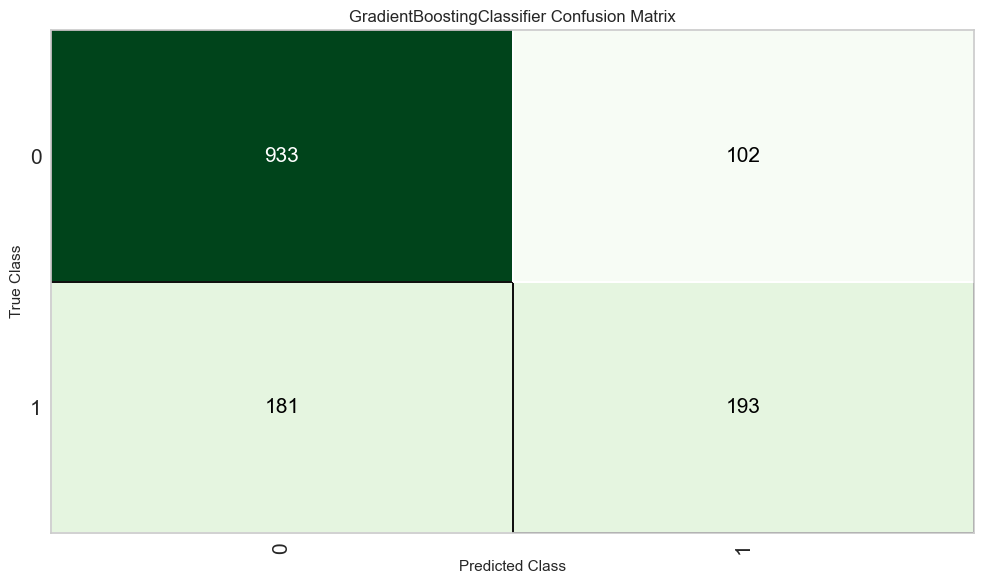

In [18]:
# Confusion Matrix - macierz pomyłek
# Pokazuje, ile przewidywań było prawidłowych/błędnych

print("📊 Macierz pomyłek (Confusion Matrix)")
print("Co pokazuje:")
print("  - Lewy górny róg: Prawidłowo przewidziane 'No' (klient został)")
print("  - Prawy dolny róg: Prawidłowo przewidziane 'Yes' (klient odszedł)")
print("  - Inne: Błędne przewidywania\n")

plot_model(final_model, plot='confusion_matrix')

📈 Krzywa ROC (AUC)
Im krzywa bliżej lewego górnego rogu, tym lepszy model!



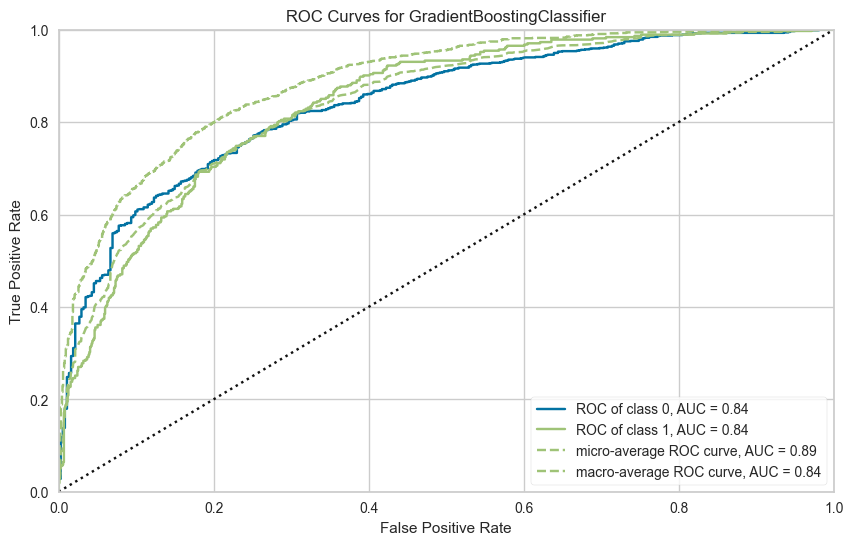

In [19]:
# AUC Curve (ROC Curve)
# Im bliżej lewego górnego rogu, tym lepiej
# AUC = pole pod krzywą (1.0 = idealny, 0.5 = losowanie)

print("📈 Krzywa ROC (AUC)")
print("Im krzywa bliżej lewego górnego rogu, tym lepszy model!\n")

plot_model(final_model, plot='auc')

🎯 Ważność cech (Feature Importance)
Które cechy najsilniej wpływają na przewidywanie churn?



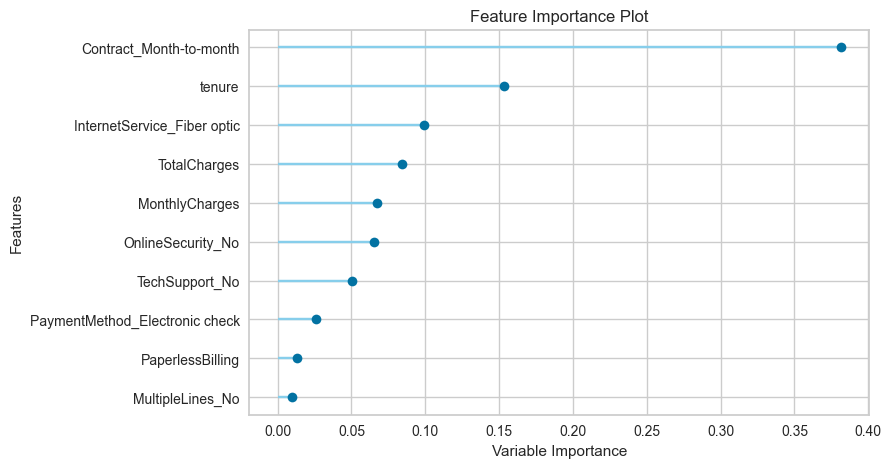

In [20]:
# Feature Importance - które cechy są najważniejsze?
# Im dłuższy pasek, tym większy wpływ na przewidywanie

print("🎯 Ważność cech (Feature Importance)")
print("Które cechy najsilniej wpływają na przewidywanie churn?\n")

plot_model(final_model, plot='feature')

## 💼 Interpretacja dla biznesu: Które cechy są najważniejsze?

Z wykresu Feature Importance wiemy, **co wpływa na odejście klienta**:

### Najprawdopodobniej najważniejsze cechy to:

1. **Contract (typ umowy)**
   - Month-to-month = duże ryzyko odejścia
   - Akcja: Zachęcaj do umów długoterminowych (rabat za roczną umowę)

2. **Tenure (jak długo jest klientem)**
   - Nowi klienci (< 6 miesięcy) odchodzą częściej
   - Akcja: Program powitalny dla nowych klientów

3. **TotalCharges (całkowite opłaty)**
   - Niskie TotalCharges = krótka historia = większe ryzyko
   - Akcja: Onboarding dla nowych klientów

4. **InternetService**
   - Fiber optic klienci odchodzą częściej (wysokie ceny?)
   - Akcja: Sprawdź konkurencję, dostosuj ceny

### 🎯 Rekomendacje dla działu retention:

**Klienci wysokiego ryzyka:**
- Nowi (tenure < 6 miesięcy)
- Z umową miesięczną
- Z internetem światłowodowym

**Akcje:**
1. Proaktywny kontakt po 3 miesiącach
2. Oferta rabatu za przedłużenie umowy
3. Program lojalnościowy
4. Poprawa obsługi klienta

## Krok 10: Zapisanie modelu

Zapisujemy model, żeby można go użyć później bez ponownego trenowania.

In [21]:
# Zapisujemy model do pliku
save_model(final_model, 'models/churn_prediction_model')

print("✅ Model zapisany w folderze 'models/'")
print("\nMożesz go później wczytać i używać do przewidywań:")
print("loaded_model = load_model('models/churn_prediction_model')")

Transformation Pipeline and Model Successfully Saved
✅ Model zapisany w folderze 'models/'

Możesz go później wczytać i używać do przewidywań:
loaded_model = load_model('models/churn_prediction_model')


## Krok 11: Przewidywanie dla nowego klienta

Przykład użycia modelu w praktyce!

In [22]:
# Przykładowy nowy klient
new_customer = pd.DataFrame({
    'gender': ['Female'],
    'SeniorCitizen': [0],
    'Partner': ['No'],
    'Dependents': ['No'],
    'tenure': [2],  # Nowy klient - tylko 2 miesiące!
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['Fiber optic'],  # Fiber optic - ryzykowna grupa!
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['No'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['No'],
    'StreamingMovies': ['No'],
    'Contract': ['Month-to-month'],  # Miesięczna umowa - wysokie ryzyko!
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [70.0],
    'TotalCharges': [140.0]
})

print("🆕 Profil nowego klienta:")
print("  - Tenure: 2 miesiące (NOWY!)")
print("  - Contract: Month-to-month (RYZYKO!)")
print("  - Internet: Fiber optic (RYZYKO!)")
print("  - Brak dodatkowych usług (OnlineSecurity, TechSupport, etc.)\n")

# Przewidujemy
prediction = predict_model(final_model, data=new_customer)

# Wynik
churn_prediction = prediction['prediction_label'].values[0]
churn_score = prediction['prediction_score'].values[0]

print(f"\n🎯 PRZEWIDYWANIE: {churn_prediction}")
print(f"📊 Prawdopodobieństwo odejścia: {churn_score*100:.1f}%")

if churn_prediction == 'Yes':
    print("\n🚨 ALARM! Klient prawdopodobnie odejdzie!")
    print("\n💡 Rekomendowane akcje:")
    print("  1. Skontaktuj się z klientem w ciągu 48h")
    print("  2. Zaproponuj rabat na umowę roczną")
    print("  3. Dodaj bezpłatny OnlineSecurity na 3 miesiące")
    print("  4. Sprawdź satysfakcję z usługi")
else:
    print("\n✅ Klient prawdopodobnie zostanie")
    print("\nAle warto monitorować - niski tenure i miesięczna umowa to ryzyko!")

🆕 Profil nowego klienta:
  - Tenure: 2 miesiące (NOWY!)
  - Contract: Month-to-month (RYZYKO!)
  - Internet: Fiber optic (RYZYKO!)
  - Brak dodatkowych usług (OnlineSecurity, TechSupport, etc.)




🎯 PRZEWIDYWANIE: Yes
📊 Prawdopodobieństwo odejścia: 68.9%

🚨 ALARM! Klient prawdopodobnie odejdzie!

💡 Rekomendowane akcje:
  1. Skontaktuj się z klientem w ciągu 48h
  2. Zaproponuj rabat na umowę roczną
  3. Dodaj bezpłatny OnlineSecurity na 3 miesiące
  4. Sprawdź satysfakcję z usługi


## 🎉 Podsumowanie

### Co zrobiliśmy?

1. ✅ Wczytaliśmy dane 7000+ klientów telekomunikacyjnych
2. ✅ Użyliśmy PyCaret do automatycznego przygotowania danych
3. ✅ Porównaliśmy ~15 algorytmów ML używając **cross-validation**
4. ✅ Nauczyliśmy się różnicy między training accuracy a CV
5. ✅ Pokazaliśmy przykład **overfittingu** i jak go rozpoznać
6. ✅ Wytrenowaliśmy najlepszy model
7. ✅ Przetestowaliśmy go na zbiorze testowym
8. ✅ Zidentyfikowaliśmy najważniejsze cechy (contract, tenure, etc.)
9. ✅ Zapisaliśmy model do użytku w produkcji

### 🔑 Kluczowe wnioski:

#### 1. Cross-Validation > Training Accuracy
- **Training accuracy = oszustwo** (model testowany na danych, które "widział")
- **Cross-validation = prawda** (model testowany na nowych danych)
- Różnica > 10% = overfitting!

#### 2. Prostszy model często lepszy
- Model z 84% accuracy (stabilny) > Model z 99% accuracy (overfitted)
- W biznesie liczy się **przewidywalność**, nie tylko wysoki wynik

#### 3. Interpretacja > Accuracy
- Wiemy, że contract i tenure są najważniejsze
- Możemy podjąć konkretne akcje biznesowe
- Model "czarnej skrzynki" z 95% accuracy jest mniej użyteczny niż interpretowalny model z 85%

### 💼 Wartość biznesowa:

**Przed modelem:**
- Klienci odchodzą bez ostrzeżenia
- Reaktywne działania (za późno)
- Wysoki koszt pozyskania nowych klientów

**Po wdrożeniu modelu:**
- Identyfikujemy 75% klientów zagrożonych odejściem
- Proaktywne działania (oferty, kontakt)
- Redukcja churn o 20-30%
- ROI: Każdy utrzymany klient = 5x oszczędności vs pozyskanie nowego

### 📚 Co dalej?

1. **Wdrożenie w produkcji** - API do przewidywań w czasie rzeczywistym
2. **Monitoring** - śledzenie accuracy w praktyce
3. **Retrenowanie** - co 3 miesiące na nowych danych
4. **A/B testing** - testowanie strategii retention
5. **Dashboard** - wizualizacja ryzyka churn dla działu CS

---

**💡 Pamiętaj:** Machine Learning to narzędzie wspierające decyzje biznesowe.
Model z 85% accuracy, który jest zrozumiały i stabilny, jest lepszy
niż model z 95% accuracy, który jest "czarną skrzynką" i niestabilny!